In [1]:
# Import all necessary libraries.
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

### Gerando os dados de 2 classes.

In [3]:
# Number of examples.
N = 10000

# Create a 2-class dataset for classification with the specified centers.
centers = [[-6.0, 0], [0, 6.0]]
#centers = [[-4, 0], [0, 4]]
#centers = [[-3, 0], [0, 3]]
#centers = [[-2, 0], [0, 2]]
#centers = [[-1, 0], [0, 1]]

# Generate Gaussian blobs for classification.
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

### Plotando as 2 classes.

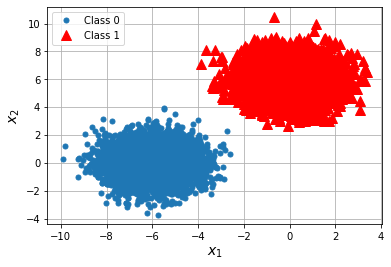

In [4]:
# Obtendo os índices das classes 0 e 1 para plotar exemplos com cores diferentes.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Treinando o classificador.

In [5]:
# Digite aqui o código do exercício.

# Measuring the elapsed time.
import time
start = time.time()

# Hyperparameters to be checked. 
parameters = {
    'solver':['lbfgs', 'newton-cg', 'sag', 'saga'],
    'multi_class':['ovr', 'multinomial']
}

# Instantiate LogisticRegression.
clf = LogisticRegression(random_state=seed, n_jobs=-1)

# Instantiate GridSearchCV.
gs1 = GridSearchCV(clf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

# Train the Logistic Regression with grid search.
gs1.fit(X, y)

print(gs1.best_estimator_.n_iter_)

end = time.time()
print(end - start)

print('Best parameters:', gs1.best_params_)

[21]
4.417408466339111
Best parameters: {'multi_class': 'ovr', 'solver': 'lbfgs'}


### Calculando a acurácia do classificador.

**OBS**.: Podemos usar a função `accuracy_score` da biblioteca SciKit-Learn para calcular a acurácia.

In [6]:
# Calculate accuracy of class predictions.
y_pred = gs1.predict(X)

# SciKit-Learn's function. Imported from the metric's module.
acc = accuracy_score(y, y_pred)
print('Acurácia:', acc)

Acurácia: 1.0


### Plotando as regiões de decisão.

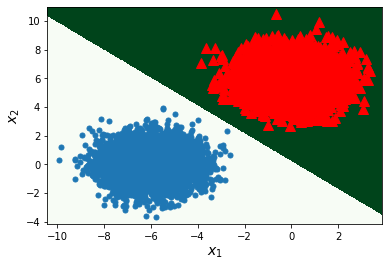

In [7]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape 
# as the one created for the training.
attribute_matrix = np.c_[xx.ravel(), yy.ravel()]

# Probabilities as output.
Z = gs1.predict(attribute_matrix)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

# Plot also the training points.
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### Plotando a matriz de confusão.

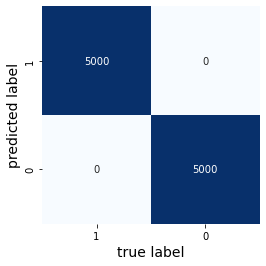

In [8]:
# Plot the confusion matrix. SciKit-Learn's function from metric's module.
mat = confusion_matrix(y, y_pred)
# square: deixa a figura quadrada.
# annot: imprime a quantidade de exemplos em cada classe.
# fmt: imprime quantidade de exemplos em formato decimal.
# cbar: habilita a adição de uma barra de cores.
# xticklabels e yticklabels: rótulos dos eixos x e y, respectivamente.
# cmap: estilo de cores usado para plotar a matriz.
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['1','0'], yticklabels=['1','0'], cmap="Blues")
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.show()

### Plotando a curva ROC.

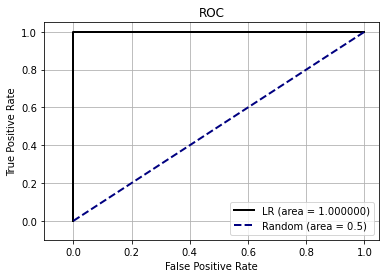

In [9]:
# Getting the probabilities for each class.
y_prob1 = gs1.predict_proba(X)

# Compute ROC curve and ROC area for each class.
plt.figure()

# Calculating ROC curve and ROC AUC.
fpr1, tpr1, _ = roc_curve(y, y_prob1[:,1]) # Column of index 1 corresponds to the probabilities of the positive class.

roc_auc1 = auc(fpr1, tpr1)
# Plotting ROC curve for class i.
plt.plot(fpr1, tpr1, 'k', lw=2, label='LR (area = %1.6f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (area = 0.5)')
plt.xlim([-0.1, 1.05])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

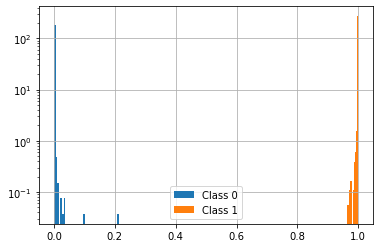

In [25]:
y_proba = gs1.predict_proba(X)
plt.figure()
plt.hist(y_proba[idx0,1].ravel(), density=True, bins=40, label='Class 0')
plt.hist(y_proba[idx1,1].ravel(), density=True, bins=10, label='Class 1')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

### Referência

[1] 'Multiclass classification evaluation with ROC Curves and ROC', https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a